In [151]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from math import log
from matplotlib import pyplot as plt

In [152]:
#import documents
df=pd.read_csv("world-happiness-report-2021.csv")
df1=pd.read_csv("world-happiness-report.csv")
df1=df1.dropna()
df1

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [153]:
newdf= {
    "ladder": np.array(df1["Life Ladder"]),
    "loggedgdp": np.array(df1["Log GDP per capita"]),
    "healthy": np.array(df1["Healthy life expectancy at birth"]),
    "freedom": np.array(df1["Freedom to make life choices"]),
    "corruption": np.array(df1["Perceptions of corruption"]),
    "Social supp": np.array(df1["Social support"]),
    "Generosity": np.array(df1["Generosity"])
}

In [154]:
#Regression list
newdf=pd.DataFrame(newdf)
regx=newdf[["ladder","healthy","Generosity","corruption","Social supp"]]
y=newdf["loggedgdp"]




In [155]:
#New regression
x=sm.add_constant(regx)
model=sm.OLS(y,x).fit()
prediction=model.predict(x)



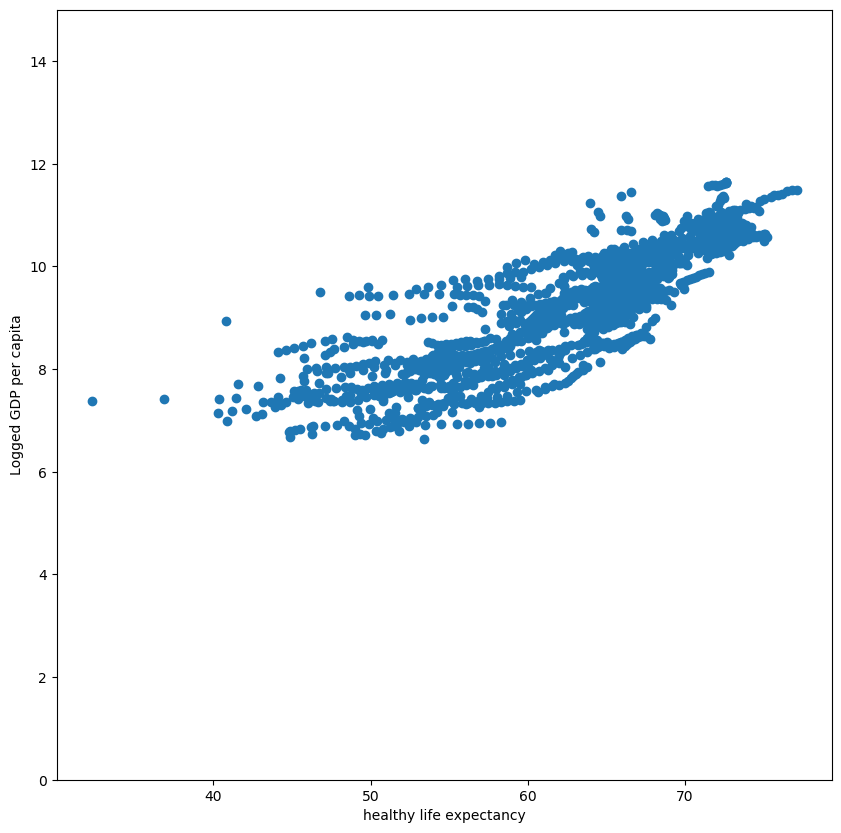

In [156]:

plt.ylim(0,15)
plt.xlabel("Generosity")
plt.ylabel("Logged GDP per capita")
plt.scatter(newdf["healthy"],y)
